### Try-it 8.1: The "Best" Model

This module was all about regression and using Python's scikitlearn library to build regression models.  Below, a dataset related to real estate prices in California is given. While many of the assignments you have built and evaluated different models, it is important to spend some time interpreting the resulting "best" model.  


Your goal is to build a regression model to predict the price of a house in California.  After doing so, you are to *interpret* the model.  There are many strategies for doing so, including some built in methods from scikitlearn.  One example is `permutation_importance`.  Permutation feature importance is a strategy for inspecting a model and its features importance.  

Take a look at the user guide for `permutation_importance` [here](https://scikit-learn.org/stable/modules/permutation_importance.html).  Use  the `sklearn.inspection` modules implementation of `permutation_importance` to investigate the importance of different features to your regression models.  Share these results on the discussion board.

In [16]:
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
cali = pd.read_csv('data/housing.csv')

In [19]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [20]:
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


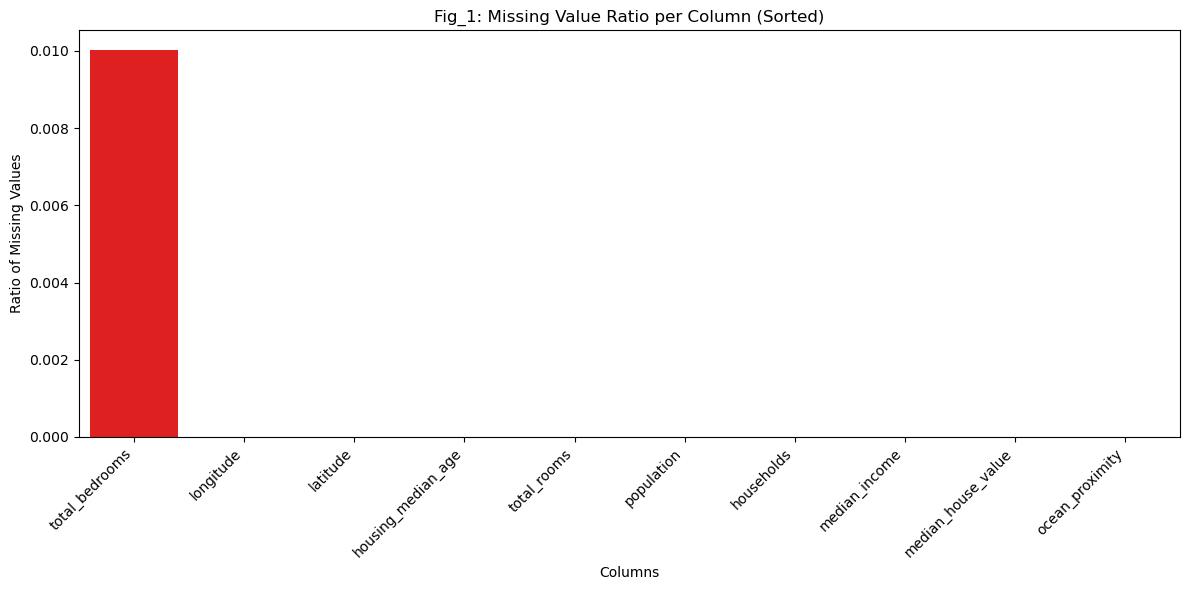

In [21]:
# Gets the mean of missing values in each column. Since True = 1 and False = 0 the mean tells us how much of the data is missing.
missing_values = cali.isnull().mean().sort_values(ascending=False)

# Create the bar plot with Seaborn
plt.figure(figsize=(12, 6))
fig1 = sns.barplot(x=missing_values.index, y=missing_values.values, color='red')

# Customize the plot
plt.xlabel('Columns')
plt.ylabel('Ratio of Missing Values')
plt.title('Fig_1: Missing Value Ratio per Column (Sorted)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot
plt.savefig('images/fig1.jpg')

# Show the plotb
plt.show()

In [22]:
cali_w_dummies = pd.get_dummies(cali, columns=['ocean_proximity'])
print(cali_w_dummies.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                      False                   False                   False   
1   

In [23]:
def find_highest_correlations_against_feature(data_frame, feature):
    # Compute the correlation matrix
    correlation_matrix = data_frame.corr()

    # Get the correlation values for a given feature
    feature_correlation = correlation_matrix[feature]

    # Drop the original feature to avoid self-correlation
    feature_correlation = feature_correlation.drop(feature)

    # Sort the correlations
    sorted_correlation = feature_correlation.sort_values(ascending=False)

    return sorted_correlation

In [24]:
find_highest_correlations_against_feature(cali_w_dummies, 'median_house_value')

median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

In [25]:
X = cali_w_dummies.drop('median_house_value', axis=1)
y = cali_w_dummies['median_house_value']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Answer check
print(X_train.shape)
print(X_test.shape)
print(type(X_train), type(y_train))#should be DataFrame and Series

(14448, 13)
(6192, 13)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [27]:
train_mses = []
test_mses = []
features = ['median_income', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'total_rooms']
# features = ['median_income', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_NEAR BAY']
degree_names = []            
#for degree in 1 - 5
for i in range(1, 5):
    degree_names.append(f'degree-{i}')
    #create pipeline with PolynomialFeatures degree i 
    poly_transformer = make_column_transformer(
        (PolynomialFeatures(degree=i), make_column_selector(dtype_include=np.number)),
        (StandardScaler(), features)  
    )
    
    pipe = Pipeline([
        ('transformer', poly_transformer),
        ('line_reg', LinearRegression())
    ])
    #fit on train
    pipe.fit(X_train[features], y_train)
    #predict on train and test
    train_pred = pipe.predict(X_train[features])
    test_pred = pipe.predict(X_test[features])
    #compute mean squared errors
    train_mse = mean_squared_error(train_pred, y_train)
    test_mse = mean_squared_error(test_pred, y_test)
    #append to train_mses and test_mses respectively
    train_mses.append(train_mse)
    test_mses.append(test_mse)

# Answer check
print(train_mses)
print(test_mses)
print(degree_names)

pipe

[5512288909.395591, 5475106373.090977, 5336610764.026723, 6914882318.621901]
[5428318940.587515, 5404065792.761115, 5317816991.567535, 7036158655.284551]
['degree-1', 'degree-2', 'degree-3', 'degree-4']


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('polynomialfeatures',
                                                  PolynomialFeatures(degree=4),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff6ebde7f90>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['median_income',
                                                   'ocean_proximity_<1H OCEAN',
                                                   'ocean_proximity_INLAND',
                                                   'total_rooms'])])),
                ('line_reg', LinearRegression())])

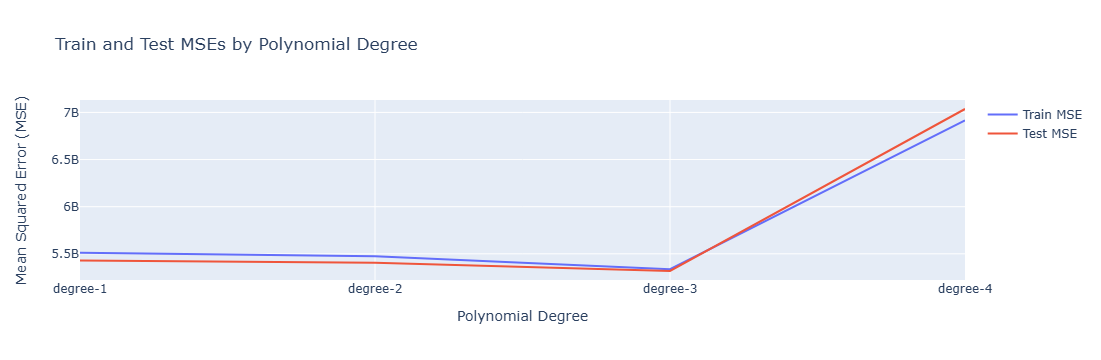

In [28]:
import plotly.graph_objects as go

# Assuming train_mses, test_mses, and degree_names are already defined as per your code

# Create traces for train and test MSEs
trace1 = go.Scatter(
    x=degree_names,
    y=train_mses,
    mode='lines',
    name='Train MSE'
)
trace2 = go.Scatter(
    x=degree_names,
    y=test_mses,
    mode='lines',
    name='Test MSE'
)

# Layout for the graph
layout = go.Layout(
    title='Train and Test MSEs by Polynomial Degree',
    xaxis=dict(title='Polynomial Degree'),
    yaxis=dict(title='Mean Squared Error (MSE)'),
    hovermode='closest'
)

# Figure combining data and layout
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Show the figure
fig.show()

In [29]:
### GRADED
best_complexity =  test_mses.index(min(test_mses)) + 1
best_mse = min(test_mses)

# Answer check
print(f'The best degree polynomial model is:  {best_complexity}')
print(f'The smallest mean squared error on the test data is : {best_mse: .2f}')

The best degree polynomial model is:  3
The smallest mean squared error on the test data is :  5317816991.57


## Our Best Model:

In [30]:
#create pipeline with PolynomialFeatures degree = best_complexity
poly_transformer = make_column_transformer(
    (PolynomialFeatures(degree=best_complexity), make_column_selector(dtype_include=np.number)),
    (StandardScaler(), features)  
)

pipe = Pipeline([
    ('transformer', poly_transformer),
    ('line_reg', LinearRegression())
])
#fit on train
pipe.fit(X_train[features], y_train)
#predict on train and test
train_pred = pipe.predict(X_train[features])
test_pred = pipe.predict(X_test[features])
#compute mean squared errors
train_mse = mean_squared_error(train_pred, y_train)
test_mse = mean_squared_error(test_pred, y_test)

In [31]:
pipe.score(X_test, y_test)

0.5948453719692597

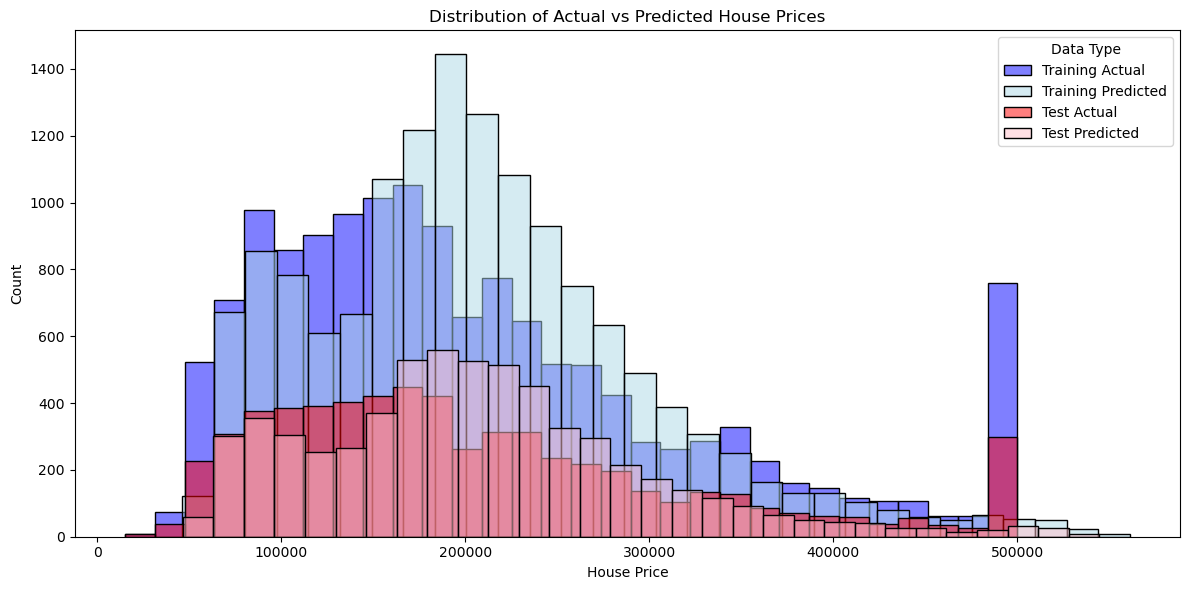

In [40]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
# Create a figure with larger size
plt.figure(figsize=(12, 6))

# Replace inf values with NaN
y_train_clean = np.nan_to_num(y_train, nan=np.nan)
train_pred_clean = np.nan_to_num(train_pred, nan=np.nan)
y_test_clean = np.nan_to_num(y_test, nan=np.nan)
test_pred_clean = np.nan_to_num(test_pred, nan=np.nan)

# Create histogram plots for each dataset
sns.histplot(data=pd.Series(y_train_clean), label='Training Actual', alpha=0.5, color='blue', bins=30, stat='count')
sns.histplot(data=pd.Series(train_pred_clean), label='Training Predicted', alpha=0.5, color='lightblue', bins=30, stat='count')
sns.histplot(data=pd.Series(y_test_clean), label='Test Actual', alpha=0.5, color='red', bins=30, stat='count')
sns.histplot(data=pd.Series(test_pred_clean), label='Test Predicted', alpha=0.5, color='pink', bins=30, stat='count')

# Customize the plot
plt.xlabel('House Price')
plt.ylabel('Count')
plt.title('Distribution of Actual vs Predicted House Prices')

# Add legend
plt.legend(title='Data Type')

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('images/fig_predictions.jpg')

# Show the plot
plt.show()

## Distribution Shape and Range:

The majority of house prices (both actual and predicted) fall between approximately 100,000  and  400,000
The distribution is right-skewed, meaning there are fewer expensive houses than affordable ones
There's a noticeable spike around $500,000 which might indicate a specific housing segment or locality


### Model Performance:

The blue (Training Actual) and light blue (Training Predicted) distributions largely overlap, suggesting your model is capturing the overall distribution pattern of the training data
Similarly, the red (Test Actual) and pink (Test Predicted) distributions follow each other closely, indicating consistent performance on unseen data
The predicted distributions (light blue and pink) appear slightly smoother than the actual distributions, suggesting the model tends to "average out" extreme values


### Training vs Test Set Comparison:

The test set (red) appears to have a similar distribution to the training set (blue), which is good - it means your train/test split was representative
The model performs similarly on both sets, as evidenced by the similar overlapping patterns between actual and predicted values in both cases


### Potential Issues:

There might be some bias in predicting extreme values, particularly for very expensive houses (>400,000)
The spike at 500,000 might indicate a limitation in your data or model's ability to handle certain price ranges

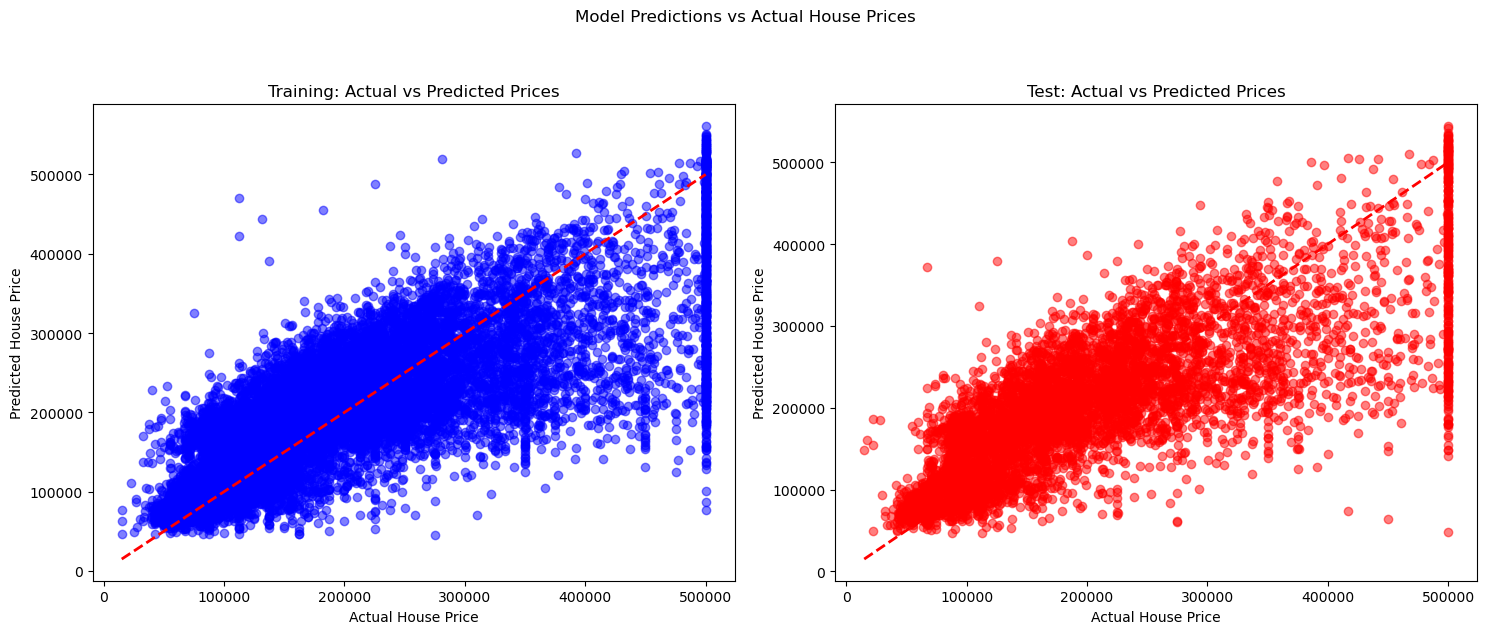

In [41]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training data scatter plot
ax1.scatter(y_train, train_pred, alpha=0.5, color='blue')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Perfect prediction line
ax1.set_xlabel('Actual House Price')
ax1.set_ylabel('Predicted House Price')
ax1.set_title('Training: Actual vs Predicted Prices')

# Test data scatter plot
ax2.scatter(y_test, test_pred, alpha=0.5, color='red')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
ax2.set_xlabel('Actual House Price')
ax2.set_ylabel('Predicted House Price')
ax2.set_title('Test: Actual vs Predicted Prices')

# Add a main title
plt.suptitle('Model Predictions vs Actual House Prices', y=1.05)

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('images/predictions_scatter.jpg', bbox_inches='tight')

# Show the plot
plt.show()

## Scatter Plot Analysis of House Price Predictions

### Overall Trend
- There's a positive correlation between actual and predicted prices (shown by the upward trend)
- The red dashed line represents perfect predictions - points on this line would mean the model predicted exactly the actual price
- Points above the line are overestimates, below are underestimate#s

## Prediction Quality
- The spread of points around the red line increases as prices get higher, indicating less accuracy for expensive homes
- The model performs similarly on both training (blue) and test (red) data, which is good
- There's more variance in predictions for mid-range houses (200k#-400k)

## The Vertical Cloud Pattern
The thick vertical cloud on the right side (around 500k) is particularly interesting and could be due to:
- Data censoring/truncation: The original dataset might have grouped all houses above a certain price (say 500k) into one category
- Regional price caps: There might be a specific market segment (like a particular city/region) where houses cluster around this price point
- Data collection artifact: It could be how the data was collected or recorded, where very expensive houses were round#ed or capped

## Model Limitations
- The model seems to struggle with very expensive houses (>400k), showing more scattered predictions
- There's a tendency to regress towards the mean - very expensive houses are often underestimated while very cheap houses migh## t be overestimated

This visualization suggests the model might benefit from:
- Additional features specifically relevant to high-priced homes
- Possibly treating expensive houses as a separate segment
- Investigating the 500k price point to understand what's causing the vertical clustering

In [39]:
from sklearn.inspection import permutation_importance
r = permutation_importance(pipe, X_test, y_test,
                           n_repeats=30,
                           random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_test.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

median_income0.731 +/- 0.011
ocean_proximity_INLAND0.300 +/- 0.007
ocean_proximity_<1H OCEAN0.015 +/- 0.001
total_rooms0.003 +/- 0.001


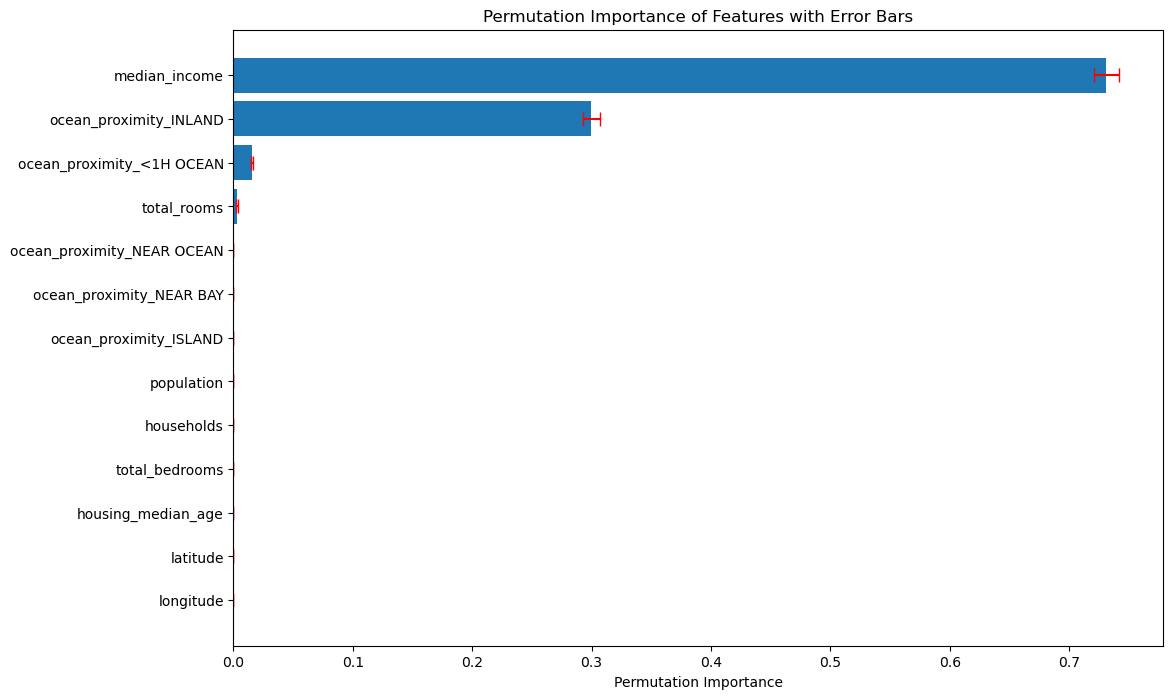

In [182]:
import matplotlib.pyplot as plt


# Assuming 'pipe' is your fitted pipeline and 'X_test', 'y_test' are your test data
r = permutation_importance(pipe, X_test, y_test, n_repeats=30, random_state=0)

# Sort the features by their importance
sorted_idx = r.importances_mean.argsort()

# Plot the permutation importance
plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(sorted_idx)), r.importances_mean[sorted_idx], align='center')

# Add error bars
plt.errorbar(r.importances_mean[sorted_idx], np.arange(len(sorted_idx)), xerr=r.importances_std[sorted_idx], fmt='none', ecolor='red', capsize=5)

plt.yticks(range(len(sorted_idx)), X_test.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance of Features with Error Bars')
plt.show()